# Step 1: Set up Google Colab Environment

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn


# Step 2: Load and Explore the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'heart.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Step 3: Data Preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


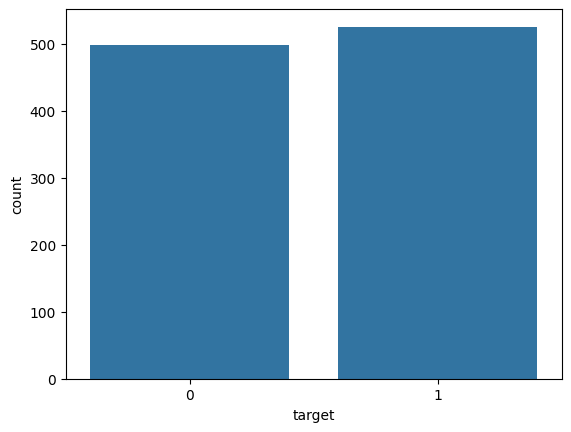

In [3]:
# Check for missing values
df.isnull().sum()

# Data types and basic statistics
df.info()
df.describe()

# Assuming the target column is named 'target', change as needed
target_column = 'target'
features = df.drop(columns=[target_column])
target = df[target_column]

# Check the distribution of the target variable
sns.countplot(x=target)
plt.show()


# Step 4: Splitting the Data

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# Step 5: Model Building and Training

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Train the models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)


RandomForestClassifier()

# Step 6: Model Evaluation

Evaluating Logistic Regression
Accuracy: 0.7951219512195122
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Confusion Matrix:


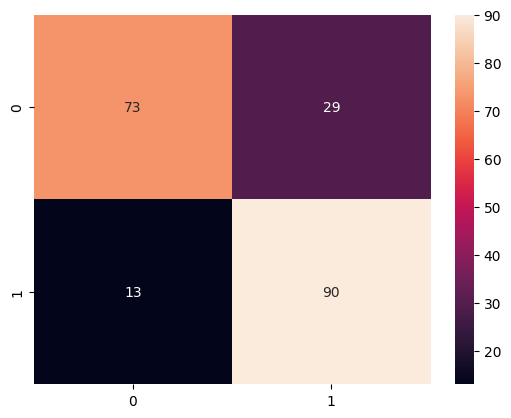

Evaluating Decision Tree
Accuracy: 0.9853658536585366
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:


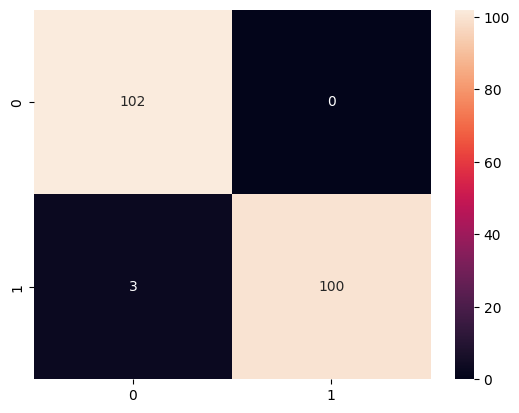

Evaluating Random Forest
Accuracy: 0.9853658536585366
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:


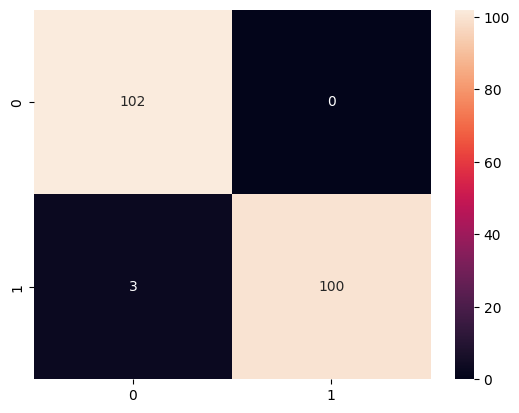

In [6]:
# Evaluate the models
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest
}

for name, model in models.items():
    print(f"Evaluating {name}")
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.show()


# Step 8: Making Predictions on New Data

In [7]:
def predict_disease(model, input_data):
    """
    Predicts whether a person has the disease or not based on input data.

    Parameters:
    model: Trained model
    input_data: List or DataFrame with the same feature columns as the training data

    Returns:
    Prediction result
    """
    input_df = pd.DataFrame([input_data], columns=features.columns)
    prediction = model.predict(input_df)
    return "Disease" if prediction[0] == 1 else "No Disease"

# Example usage
new_patient_data = {
    'age': 45,
    'sex': 1,
    'cp': 3,
    'trestbps': 140,
    'chol': 233,
    'fbs': 1,
    'restecg': 0,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 2.3,
    'slope': 0,
    'ca': 0,
    'thal': 1
}

# Convert to DataFrame row
new_patient_data_df = pd.DataFrame([new_patient_data])

# Use the best performing model (replace `random_forest` with the chosen model)
prediction_result = predict_disease(random_forest, new_patient_data)
print(f"The prediction for the new patient data is: {prediction_result}")


The prediction for the new patient data is: Disease


# Step 9: Visualizing Predictions

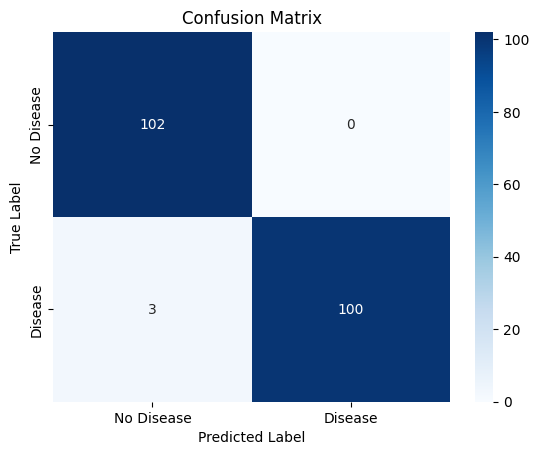

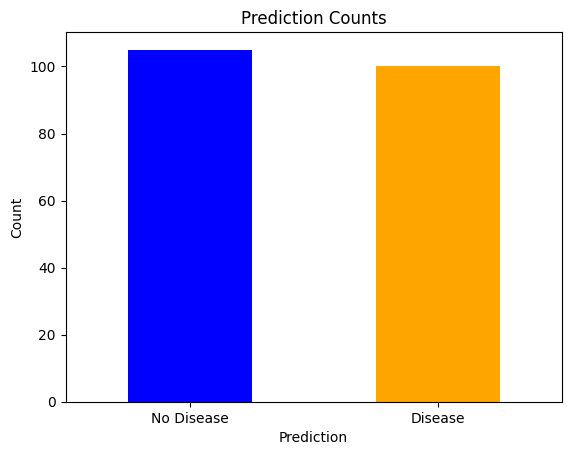

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot predictions
def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Create a DataFrame for easy plotting
    results = pd.DataFrame({
        'True Label': y_test,
        'Predicted Label': y_pred
    })

    # Plot confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot a bar plot for counts of predictions
    prediction_counts = results['Predicted Label'].value_counts().sort_index()
    prediction_counts.plot(kind='bar', color=['blue', 'orange'])
    plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'], rotation=0)
    plt.xlabel('Prediction')
    plt.ylabel('Count')
    plt.title('Prediction Counts')
    plt.show()

# Example usage
plot_predictions(random_forest, X_test, y_test)
